1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


### <a class="anchor" id="0"></a>Навигация:
* [Знакомство с данными](#1)
* [Предобработка данных](#2)
  * [Приведите заголовки к удобному виду](#3)
  * [Проверьте типы данных](#4)
  * [Обработайте пропуски](#5)
  * [Проверьте наличие дубликатов](#6)
  * [Исключите нулевые значения в выручке для дальнейшего исследования](#7)
* [Исследовательский анализ данных](#8)
  * [Создайте отчеты о динамике продаж](#9)
  * [Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.](#10)
  * [Исследуйте сезонность продаж](#11)
  * [Исследуйте выручку от продаж в зависимости от раницы между днем покупки и днем вылета](#12)
  * [Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ.](#13)

### <a class="anchor" id="1"></a> Знакомство с данными

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [2]:
data = pd.read_csv('air_data.csv', sep = ';')
data.head(1)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


In [3]:
data.shape

(50000, 9)

__ВЫВОД__:

Мы загрузили файл air_data.csv. Он содержит информацию о продажах авиабилетов с такими признаками, как дата покупки, дата перелета, тип пассажиров, сумма выручки, города отправления и назначения, наличие программы лояльности и способ покупки. Датасет состоит из 50 тысяч строк и 9 столбцов.


[К навигации](#0)

### <a class="anchor" id="2"></a> Предобработка данных

### <a class="anchor" id="3"></a> Приведите заголовки к удобному виду

In [4]:
#Приводим заголовки к удобному виду
data.columns = data.columns.str.lower()
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE


[К навигации](#0)

### <a class="anchor" id="4"></a>Проверьте типы данных

In [5]:
#Провереям типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB



Тип данных неверен в столбцах с информацией о дате

In [6]:
# Исправляем тип данных в столбцах с информацией о дате
data['issue_date'] = pd.to_datetime(data['issue_date'], format='%Y-%m-%d %H:%M:%S')
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'], format='%Y-%m-%d %H:%M:%S')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB



Мы исправили все неверные типы данных. В столбцах с информацией о времени мы поменяли тип object на тип datetime

[К навигации](#0)

### <a class="anchor" id="5"></a> Обработайте пропуски

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [9]:
data['revenue_amount'].mean()

433.7186


Пропуски есть в столбцах orig_city_code, dest_city_code и ffp_flag

In [10]:
# Изучаем пропуски в столбце orig_city_code
data[data['orig_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,NaN,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,NaN,OFFLINE


In [11]:
#Нет дополнительной информации, которая бы помогла заполнить этот пропуск, пропусков мало, можно удалить без ущерба для данных
data.drop(2020, inplace = True) 
data.drop(8100, inplace = True)


In [12]:
# Изучаем пропуски в столбце dest_city_code
data[data['dest_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,NaN,OFFLINE


In [13]:
#Нет дополнительной информации, которая бы помогла заполнить этот пропуск, он всего один, можно удалить без ущерба для данных
data.drop(47582, inplace = True) 

In [14]:
# Обновляем индексы
data.reset_index(drop=True)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49992,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49993,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49994,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49995,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [15]:
data['revenue_amount'].mean()

433.7182230933856


Среднее значение не изменилось

Мы принили решение об удалении пропусков в столбцах orig_city_code, dest_city_code, так как и мало и они не повлияют на результат

In [16]:
# Изучаем пропуски в столбце ffp_flag
data[data['ffp_flag'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
5,2021-11-29,2022-01-14,AD,250,MOW,DUS,МВЛ,NaN,ONLINE
9,2021-11-25,2022-01-03,AD,280,MOW,KUF,ВВЛ,NaN,ONLINE
...,...,...,...,...,...,...,...,...,...
49992,2022-06-22,2022-06-28,AD,810,MOW,BTK,ВВЛ,NaN,OFFLINE
49994,2022-06-27,2022-06-28,AD,450,OVB,LED,ВВЛ,NaN,OFFLINE
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE


In [17]:
# Для удобства заполним строки в этом столбце 1, если есть программа лояльности; 0 если ее нет
data['ffp_flag'] = data['ffp_flag'].fillna(0)
data.loc[data['ffp_flag'] == 'FFP', 'ffp_flag'] = 1
data[data['ffp_flag'].isna()]['ffp_flag'].count()

0

Так как у нас всего два варианта наличие и отсутвие программы лояльности, мы заполнили строки в этом столбце 1, если есть программа лояльности; 0 если ее нет

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49997 non-null  datetime64[ns]
 1   flight_date_loc    49997 non-null  datetime64[ns]
 2   pax_type           49997 non-null  object        
 3   revenue_amount     49997 non-null  int64         
 4   orig_city_code     49997 non-null  object        
 5   dest_city_code     49997 non-null  object        
 6   route_flight_type  49997 non-null  object        
 7   ffp_flag           49997 non-null  object        
 8   sale_type          49997 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB



Мы обработали все пропуски

[К навигации](#0)

### <a class="anchor" id="6"></a> Проверьте наличие дубликатов

In [19]:
data.duplicated().sum() # смотрим количество дубликатов

169

In [20]:
data[data.duplicated()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
338,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,1,ONLINE
670,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,0,OFFLINE
736,2022-02-08,2022-08-01,AD,360,MMK,MOW,ВВЛ,0,OFFLINE
909,2021-11-02,2021-11-07,AD,180,MOW,VOZ,ВВЛ,1,OFFLINE
1485,2021-11-02,2021-11-29,AD,500,MOW,HTA,ВВЛ,0,ONLINE
...,...,...,...,...,...,...,...,...,...
49282,2022-09-13,2022-10-04,AD,600,VVO,UUS,ВВЛ,0,OFFLINE
49292,2022-09-13,2022-10-03,AD,460,UUD,KHV,ВВЛ,0,OFFLINE
49424,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,1,ONLINE
49677,2022-04-02,2022-05-02,AD,470,NUX,MOW,ВВЛ,0,ONLINE


In [21]:
data = data.drop_duplicates()

Мы приняли решение об удалении дубликатов

[К навигации](#0)

### <a class="anchor" id="7"></a>Исключите нулевые значения в выручке для дальнейшего исследования

In [22]:
data = data[data['revenue_amount'] > 0] # Перезаписываем в датасет, только строки, где выручка больше 0

In [23]:
data[data['revenue_amount'] == 0]# Проверяем остались ли строки, где выручка равна 0

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type



Мы исключили нулевые значения в выручке

__ВЫВОДЫ:__
* Мы осуществили предобработку данных

### <a class="anchor" id="8"></a> Исследовательский анализ данных

### <a class="anchor" id="9"></a> Создайте отчеты о динамике продаж (выручке)

In [24]:
# Создаем отчет о динамике продаж, группируем данные по дате, ищем суммарную выручку для каждой даты
revenue_report = data.groupby('issue_date')['revenue_amount'].sum()
revenue_report

issue_date
2021-10-01    60310
2021-10-02    33100
2021-10-03    34320
2021-10-04    58190
2021-10-05    60800
              ...  
2022-09-26    39520
2022-09-27    48350
2022-09-28    44860
2022-09-29    27460
2022-09-30    25980
Name: revenue_amount, Length: 365, dtype: int64

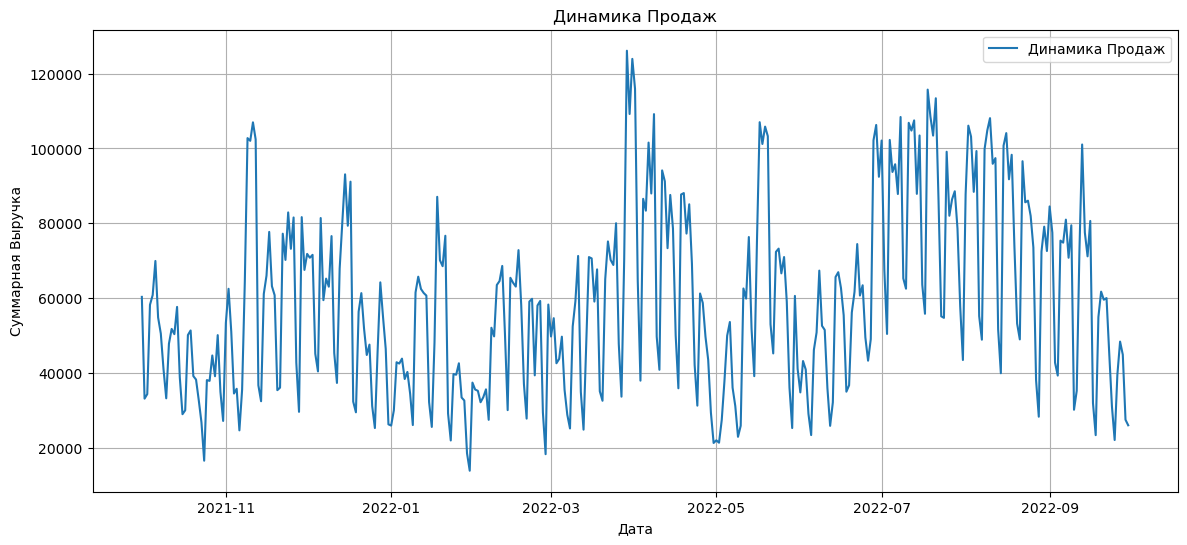

In [25]:
# Строим линейный график по этому отчету
plt.figure(figsize =(14, 6))
plt.plot(revenue_report, label = 'Динамика Продаж')
plt.title('Динамика Продаж')
plt.xlabel('Дата')
plt.ylabel('Суммарная Выручка')
plt.grid()
plt.legend()
plt.show()

__ВЫВОД__: 
* Выручка достигала пика в декабре, апреле, июне, июле, августе(больше 100 000 условных единиц)
* Самая низкая в ноябре, феврале и марте(ниже 20 000 условных единиц)
* В апреле выручка достигла максимума в 120 000 условных единиц

In [26]:
#Создаем отчет о динамике продаж,детализированный по наличию програмы лояльности; группируем данные по дате, ищем суммарную выручку для каждой даты
report_ffp = data.pivot_table(index='issue_date',
                              columns = 'ffp_flag',
               aggfunc='sum',
             values='revenue_amount').reset_index()

report_ffp.head(1)

ffp_flag,issue_date,0,1
0,2021-10-01,38160,22150


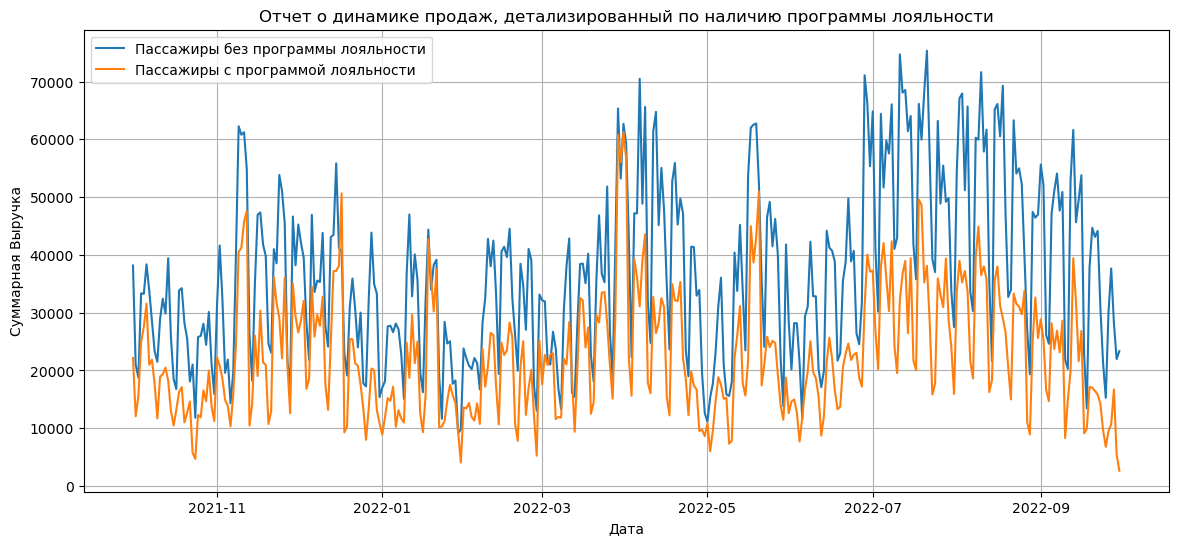

In [27]:
# Строим график по этому отчету
plt.figure(figsize =(14, 6))
sns.lineplot(data = report_ffp, x = 'issue_date', y = 0, label = 'Пассажиры без программы лояльности')
(sns.lineplot(data = report_ffp, x = 'issue_date', y = 1, label = 'Пассажиры с программой лояльности')).set(title = 'Отчет о динамике продаж, детализированный по наличию программы лояльности', xlabel = 'Дата', ylabel = 'Суммарная Выручка' )
plt.grid()
plt.show()

__ВЫВОД__:

* Суммарная выручка от пассажиров с программой лояльности меньше. Это может быть связано с тем, что количество пассажиров с программой лояльности меньше, также программа лояльности подразумевает скидки для этих пассажиров. 
* В апреле суммарная выручка от пассажиров с программой лояльности и без практически сравнялась

In [28]:
#Создаем отчет о динамике продаж,детализированный по типу перелета; группируем данные по дате, ищем суммарную выручку для каждой даты
report_flight = data.pivot_table(index='issue_date',
                              columns = 'route_flight_type',
               aggfunc='sum',
               values='revenue_amount').reset_index()
report_flight.head(1)

route_flight_type,issue_date,ВВЛ,МВЛ
0,2021-10-01,45710.0,14600.0


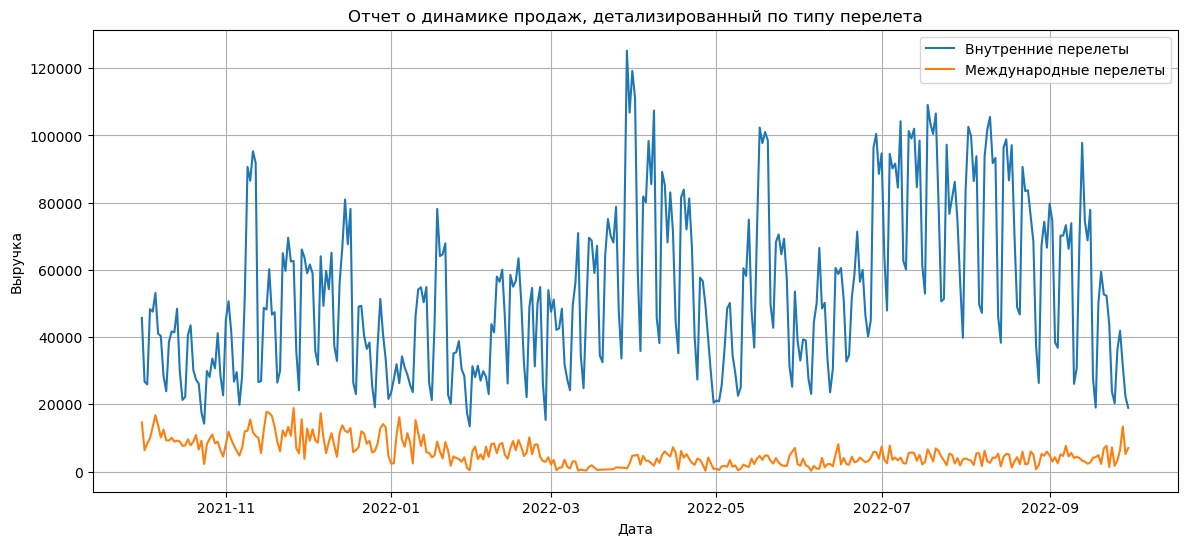

In [29]:
#Строим график по этому отчету
plt.figure(figsize =(14, 6))
sns.lineplot(data = report_flight, x = 'issue_date', y = 'ВВЛ', label = 'Внутренние перелеты')
(sns.lineplot(data = report_flight, x = 'issue_date', y = 'МВЛ', label = 'Международные перелеты')).set(title = 'Отчет о динамике продаж, детализированный по типу перелета', xlabel = 'Дата', ylabel = 'Выручка' )
plt.grid()
plt.show()

__ВЫВОД__: 
* Выручка от международных перелетов ниже, чем от внутренних. 
* Можно заметить, что в феврале, выручка от международных перелетов начала падать(что очевидно связано с политическими причинами), и так не вернулась к первоначальным значениям
* Период с минимальными значениями выручки от международных перелетов совпал с периодом максимальных значений выручки для внутренних перелетов

In [30]:
#Создаем отчет о динамике продаж,детализированный по способу оплаты; группируем данные по дате, ищем суммарную выручку для каждой даты
report_sale = data.pivot_table(index='issue_date',
                              columns = 'sale_type',
               aggfunc='sum',
               values='revenue_amount').reset_index()
report_sale.head(1)

sale_type,issue_date,OFFLINE,ONLINE
0,2021-10-01,31530,28780


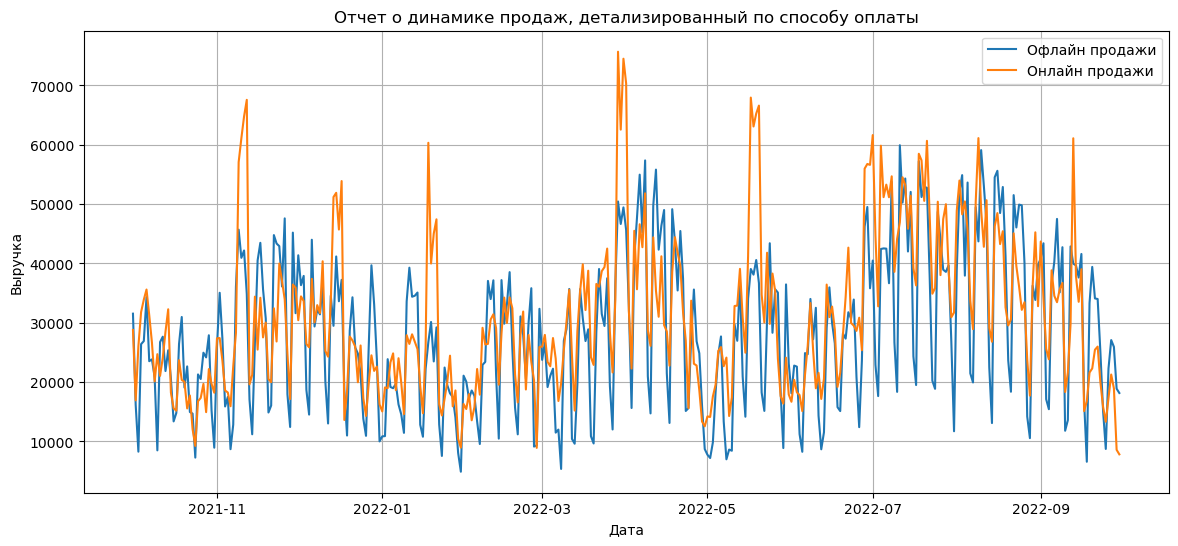

In [31]:
#Строим график по этому отчету
plt.figure(figsize =(14, 6))
sns.lineplot(data = report_sale, x = 'issue_date', y = 'OFFLINE', label = 'Офлайн продажи')
(sns.lineplot(data = report_sale, x = 'issue_date', y = 'ONLINE', label = 'Онлайн продажи')).set(title = 'Отчет о динамике продаж, детализированный по способу оплаты', xlabel = 'Дата', ylabel = 'Выручка' )
plt.grid()
plt.show()

__ВЫВОД__: 
* В некоторые периоды выручка от онлайн продаж превышает выручку от офлайн продаж почти в два раза, хотя большую часть времени значения практически совпадают
* Колебания выручки от онлайн продаж меньше, чем колебания выручки  от офлайн продаж

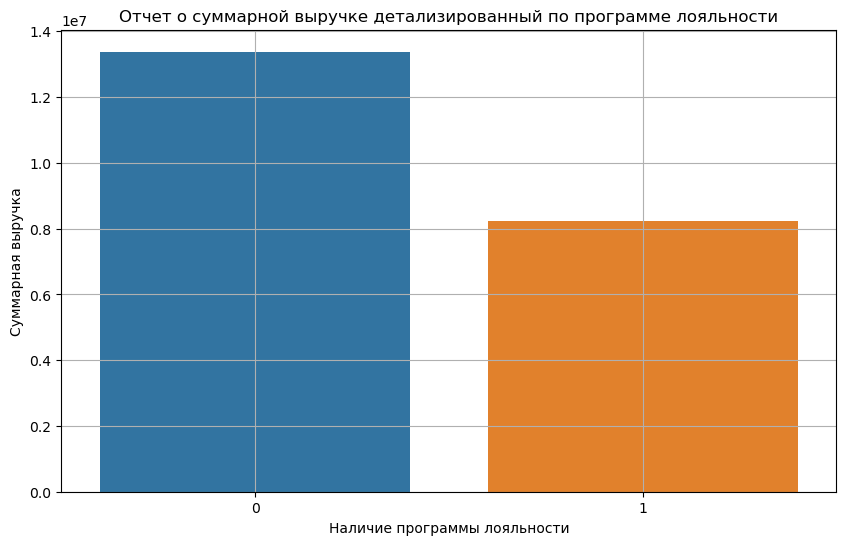

In [32]:

plt.figure(figsize =(10, 6))
sns.barplot(data = data.pivot_table(index='ffp_flag',
               aggfunc='sum',
             values='revenue_amount').reset_index(), x = 'ffp_flag', y = 'revenue_amount').set(title = 'Отчет о суммарной выручке детализированный по программе лояльности', xlabel = 'Наличие программы лояльности', ylabel = 'Суммарная выручка' )
plt.grid()
plt.show()

__ВЫВОД__: 
* Выручка от продаж без программы лояльности больше, чем выручка от продаж с программой лояльности, что скорее всего связано, что большинство клиентов не пользуются программой лояльности

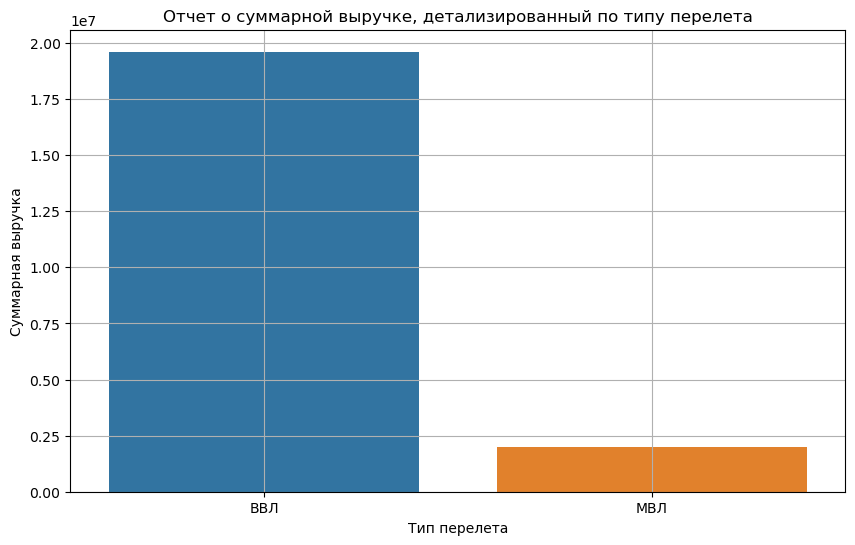

In [33]:
plt.figure(figsize =(10, 6))
sns.barplot(data = data.pivot_table(index='route_flight_type',
               aggfunc='sum',
             values='revenue_amount').reset_index(), x = 'route_flight_type', y = 'revenue_amount').set(title = 'Отчет о суммарной выручке, детализированный по типу перелета',xlabel = 'Тип перелета', ylabel = 'Суммарная выручка' )
plt.grid()
plt.show()

__ВЫВОД__: 
* Выручка от внутренних перелетов намного больше, чем от внешних, что может говорить о малом числе международных перелетов

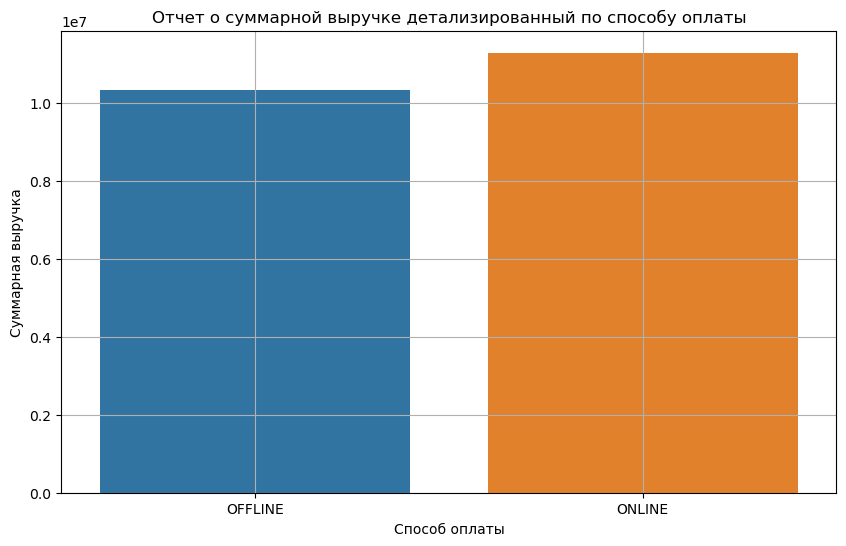

In [34]:
plt.figure(figsize =(10, 6))
sns.barplot(data = data.pivot_table(index='sale_type',
               aggfunc='sum',
             values='revenue_amount').reset_index(), x = 'sale_type', y = 'revenue_amount').set(title = 'Отчет о суммарной выручке детализированный по способу оплаты', xlabel = 'Способ оплаты', ylabel = 'Суммарная выручка' )
plt.grid()
plt.show()

__ВЫВОД__: 
* Нет большой разницы между суммарной выручкой от онлайн и оффлайн продаж 

[К навигации](#0)

### <a class="anchor" id="10"></a>Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.

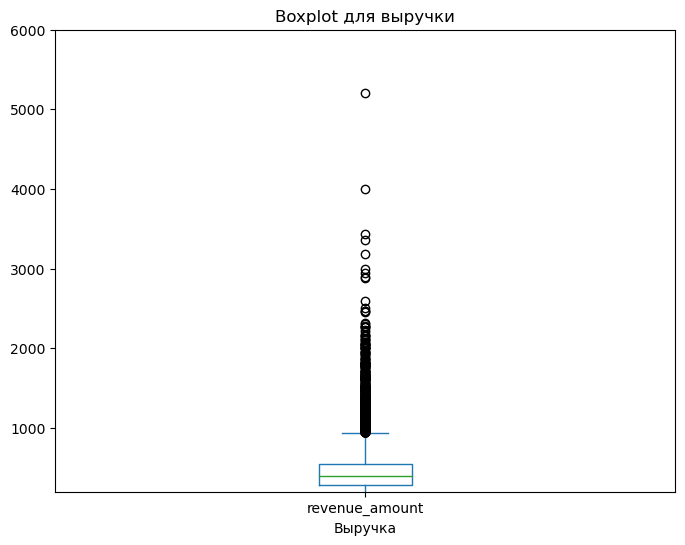

In [35]:
# Строим boxplot для выручки, чтобы наглядно изучить ее распределение
plt.figure(figsize=(10, 6))
data['revenue_amount'].plot(kind='box',
                       figsize=(8, 6),
                            ylim = (200, 6000))
plt.title('Boxplot для выручки')
plt.xlabel('Выручка')
plt.show()

В наших данных присутсвуют выбросы

In [36]:
data['revenue_amount'].describe() # Изучим распределение выручки

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

In [37]:
# Найдем границы и количество выбросов
def ejection (col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = (q75-q25)*1.5
    ejection_h = q75+iqr
    ejection_l = q25-iqr
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count()
    return(ejection_h, ejection_l, ejection_count)
ejection('revenue_amount')

(940.0, -100.0, 987)

Мы нашли количество выбросов, оно равно 1000. Что очень много

Что может повлиять на цену билета?
* Билеты на самолет обладают свойстовом доражать к дате вылета, возможно выбросы связаны с этим
* Также цена билета может сильно зависесть от направления и частоты рейсов.


In [38]:
#Посмотрим как выбросы зависят от количества дней между покупкой билетов и вылета
tab = data[data['revenue_amount'] > ejection('revenue_amount')[0]].groupby((data['flight_date_loc'] - data['issue_date']).dt.days)['revenue_amount'].count().reset_index()
tab = pd.DataFrame(data = tab)
tab.columns = ['days', 'count']
tab.sort_values(by = 'count', ascending = False).head(10)

,days,count
1,1,114
2,2,100
3,3,89
4,4,80
5,5,66
7,7,46
6,6,41
8,8,40
10,10,36
9,9,30


In [39]:
#Посмотрим как выбросы, которые находятся за пределами 99-процентеля зависят от количества дней между покупкой билетов и вылета
tab = data[data['revenue_amount'] > data['revenue_amount'].quantile(0.99)].groupby((data['flight_date_loc'] - data['issue_date']).dt.days)['revenue_amount'].count().reset_index()
tab = pd.DataFrame(data = tab)
tab.columns = ['days', 'count']
tab.sort_values(by = 'count', ascending = False).head(10)

,days,count
1,1,67
3,3,56
2,2,50
4,4,38
5,5,33
8,8,21
7,7,19
6,6,18
9,9,16
10,10,15


__ВЫВОД:__
* Больше всего выбросов среди тех, кто купил билеты в последний момент, поэтому будет неправильно удалить выбросы, ведь мы потеряем данные об этой группе покупателей

[К навигации](#0)

### <a class="anchor" id="11"></a> Исследуйте сезонность продаж

In [40]:
data['issue_month'] = data['issue_date'].dt.month #создадим столбец с номером месяца
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12


In [41]:
def season(month): #функция, которая на вход получает номер месяца и возвращает название сезона
    if month in [1, 2, 12]:
        return 'winter'
    if month in[3, 4, 5]:
        return 'spring'
    if month in[6, 7, 8]:
        return 'summer'
    if month in [9, 10, 11]:
        return 'autumn'
data['season'] = data['issue_month'].apply(season) # Создаем столбец, для записи названия сезона. Применяем к столбцу с номером месяца, функцию для определения сезона
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter


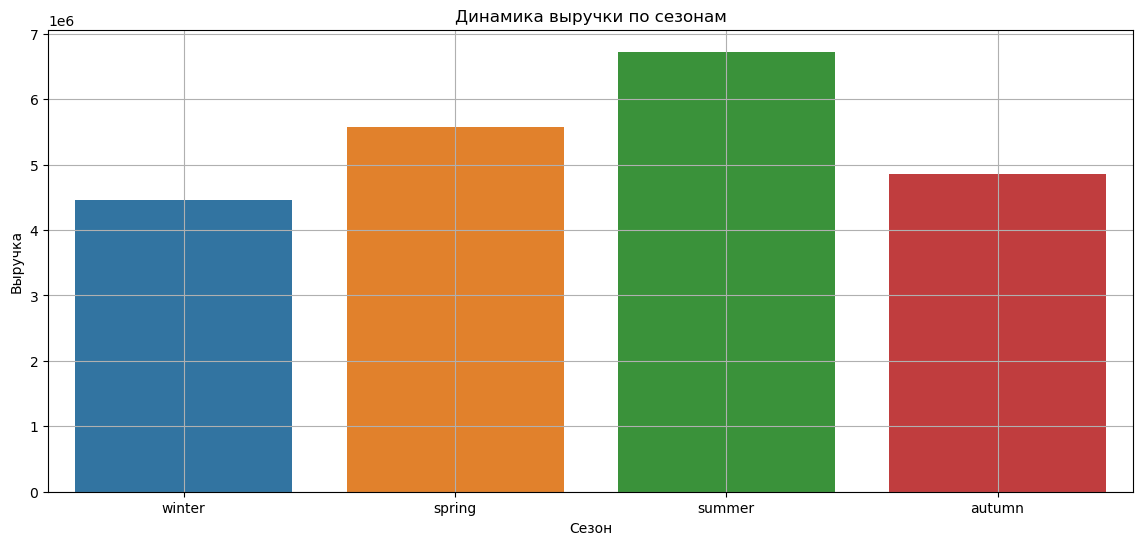

In [42]:
# Строим график динамики выручки от продаж по сезонам
season_report = data.groupby('season')['revenue_amount'].sum()
season_report = pd.DataFrame(data =season_report, index=['winter', 'spring', 'summer', 'autumn'])
plt.figure(figsize =(14, 6))
sns.barplot(data = season_report, x = season_report.index,  y = 'revenue_amount').set(title = 'Динамика выручки по сезонам', xlabel = 'Сезон', ylabel = 'Выручка')
plt.grid()
plt.show()

__ВЫВОД:__
* Пик выручки от продаж приходиться на лето, что логично ведь это сезон отпусков
* Мининум выручки от продаж приходиться на зиму

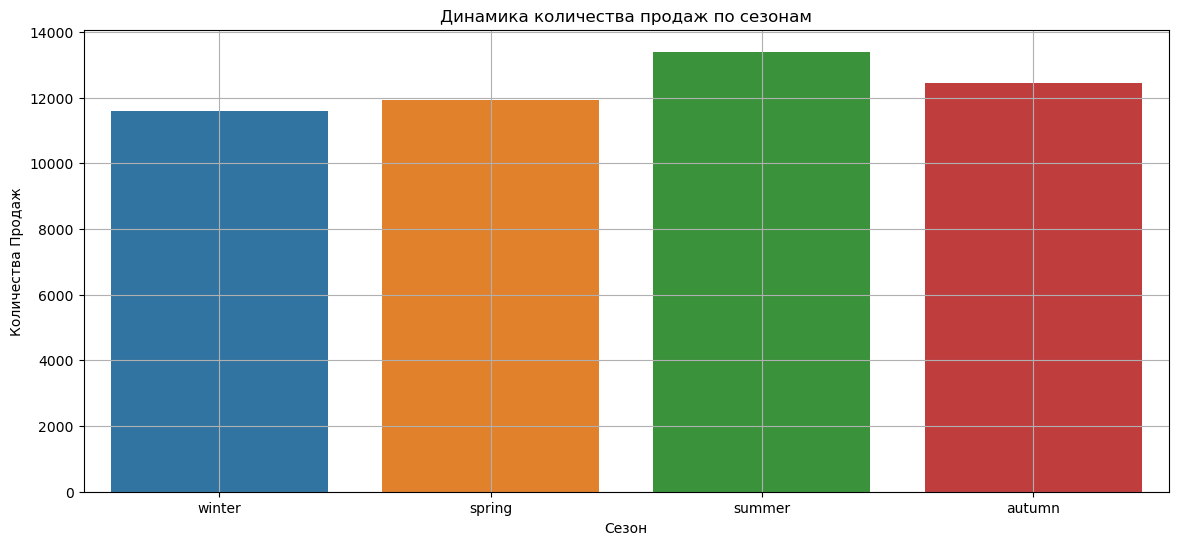

In [43]:
# Строим график динамики количества от продаж по сезонам
season_report = data.groupby('season')['revenue_amount'].count()
season_report = pd.DataFrame(data =season_report, index=['winter', 'spring', 'summer', 'autumn'])
plt.figure(figsize =(14, 6))
sns.barplot(data = season_report, x = season_report.index, y = 'revenue_amount').set(title = 'Динамика количества продаж по сезонам', xlabel = 'Сезон', ylabel = 'Количества Продаж')
plt.grid()
plt.show()

__ВЫВОД__: 
* Количество продаж авиабилетов достигло пика летом, и достигло минимума зимой.
* Количество продаж весной меньше осенью, но выручка от продаж больше весной
* Разница между количеством продаж меньше, чем разница между выручкой от продаж
* И количество продаж и выручка от продаж меньше всего зимой.

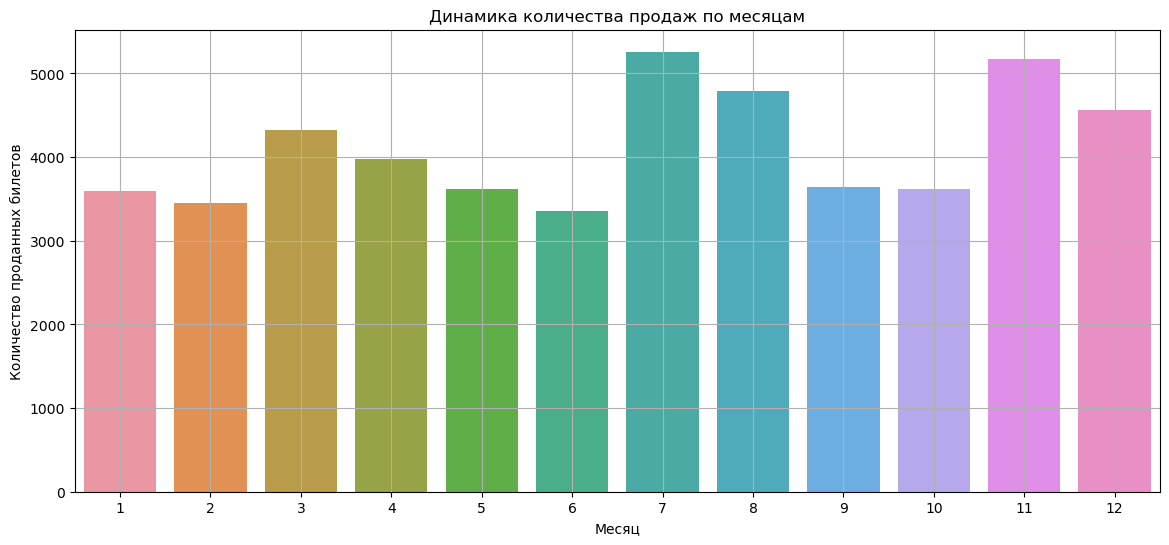

In [44]:
# Строим график динамики количества от продаж по месяца
plt.figure(figsize =(14, 6))
month_report_count = data.groupby('issue_month')['revenue_amount'].count().reset_index()
sns.barplot(data = month_report_count, x = 'issue_month', y = 'revenue_amount').set(title = 'Динамика количества продаж по месяцам', xlabel = 'Месяц', ylabel = 'Количество проданных билетов')
plt.grid()
plt.show()


__ВЫВОД:__
* Больше всего билетов покупали в июле и ноябре. 
* Меньше всего в июне и феврале

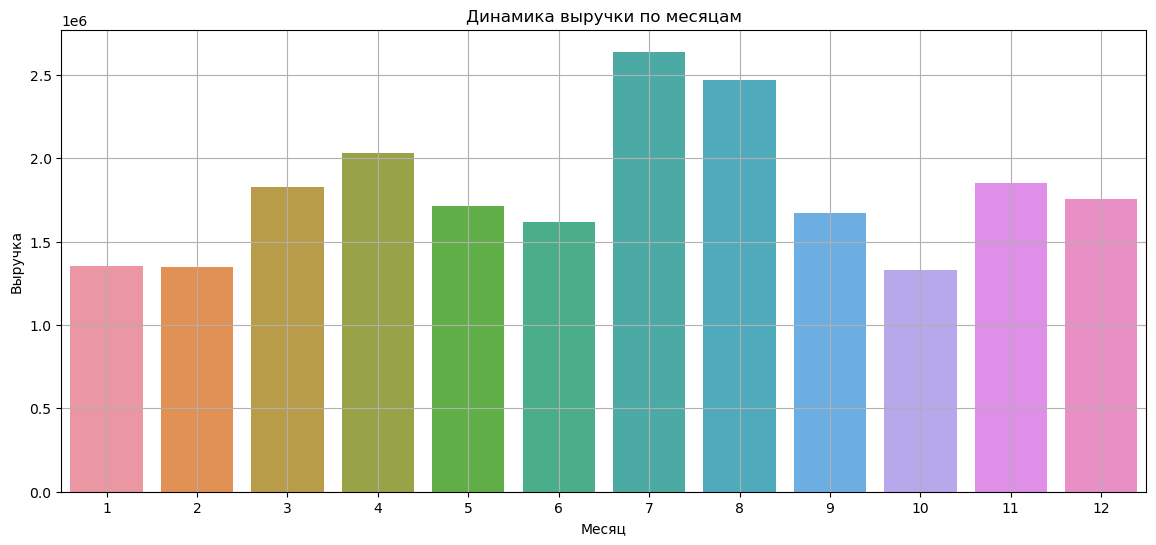

In [45]:
# Строим график динамики выручки по месяцам
plt.figure(figsize =(14, 6))
month_report_sum = data.groupby('issue_month')['revenue_amount'].sum().reset_index()
sns.barplot(data = month_report_sum, x = 'issue_month', y = 'revenue_amount').set(title = 'Динамика выручки по месяцам', xlabel = 'Месяц', ylabel = 'Выручка')
plt.grid()
plt.show()

__ВЫВОД:__
* Выручка достигает максимума в июле, а минимума в октябре
* Количество билетов проданных в июле и ноябре практическо идентично, а выручка в ноябре намного ниже, чем в июле

In [46]:
# создаем таблицу корреляцию для количества продаж и выручки
month_report_count.merge(month_report_sum, on = 'issue_month', how = 'inner').corr()

,issue_month,revenue_amount_x,revenue_amount_y
issue_month,1.000000,0.460594,0.211632
revenue_amount_x,0.460594,1.000000,0.778051
revenue_amount_y,0.211632,0.778051,1.000000


__ВЫВОД:__
* Коэффициент корреляции для количества продаж и выручки равен 0,78, что означает тесную и прямую связь между количеством продаж и выручкой от них

Проверим гипотезу о том, что выручка от продаж осенью и зимой отличается

Для начала проверим наши данные на нормальность распределения

In [47]:
winter_report = data.query('season == "winter"')['revenue_amount'].tolist()
autumn_report = data.query('season == "autumn"')['revenue_amount'].tolist()

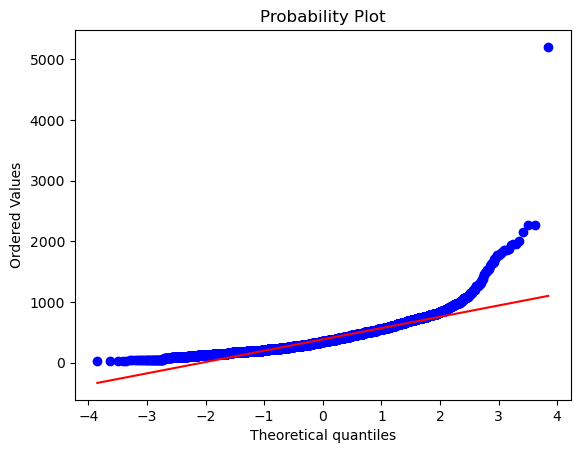

In [48]:
st.probplot(winter_report, dist = norm, plot = plt)
plt.show()

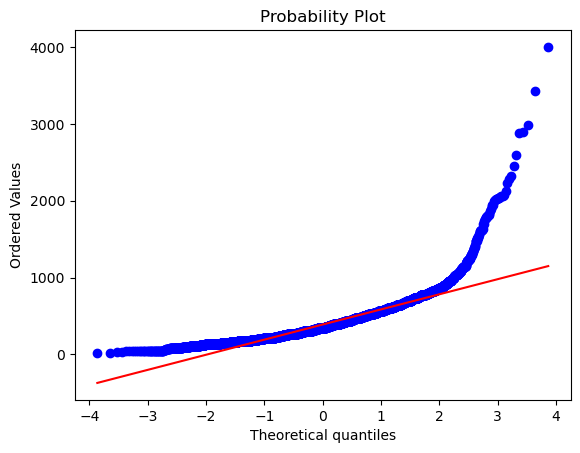

In [49]:
st.probplot(autumn_report, dist = norm, plot = plt)
plt.show()

Уже по QQ-plot видно, что выручка и зимой, и осенью не имеет нормального распределения.

Значит для проверки гипотезы нам следует использовать непараметрический тест Уилкоксона-Манна-Уитни

H0: Средняя выручка зимой и осенью равна


H1: Средняя выручка зимой и осенью не равна

In [50]:
#H0 - Выручка зимой и весной не отличается
alpha = 0.05 #уровень значимости
#Проводим тест для независимых выборок
results = st.mannwhitneyu(winter_report, autumn_report)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 0.2890358754641664
Не удалось отвергнуть нулевую гипотезу


__ВЫВОД__:
* Не удалось отвергнуть гипотезу о равенстве средней выручки зимой и осенью

[К навигации](#0)

### <a class="anchor" id="12"></a>Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.

In [51]:
data['difference'] = (data['flight_date_loc'] - data['issue_date']).dt.days # создадим столбец с разницей между датой покупки и датой вылета
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35


In [52]:
data['group'] = pd.cut(data['difference'],
                          bins=[0, 8, 32, 1000], 
                          labels=['В последний момент', 'За месяц','Заранее'],
                         )# Категоризуем выручку от продаж по интервалам
data.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее


In [53]:
data.groupby('group')['revenue_amount'].sum().reset_index() # Посчитаем выручку в каждой группе

,group,revenue_amount
0,В последний момент,9633790
1,За месяц,7310760
2,Заранее,4140730


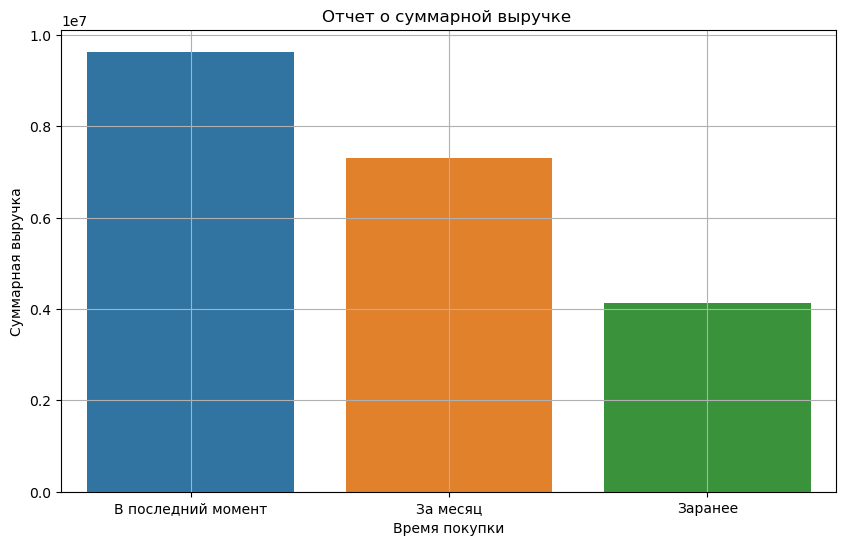

In [54]:
plt.figure(figsize =(10, 6))
sns.barplot(data =data.groupby('group')['revenue_amount'].sum().reset_index() , x = 'group', y = 'revenue_amount').set(title = 'Отчет о суммарной выручке ', xlabel = 'Время покупки', ylabel = 'Суммарная выручка' )
plt.grid()
plt.show()

In [55]:
data.groupby('group')['revenue_amount'].count()

group
В последний момент    22041
За месяц              16755
Заранее                9236
Name: revenue_amount, dtype: int64

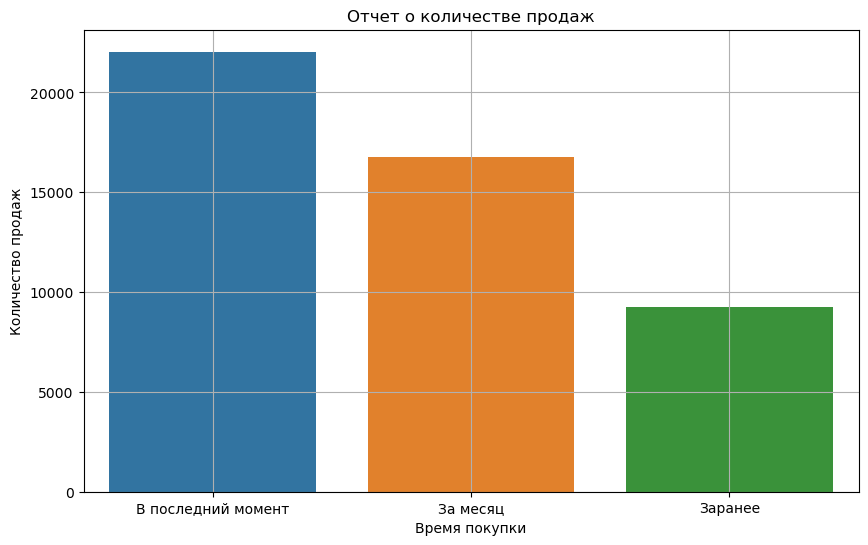

In [56]:
plt.figure(figsize =(10, 6))
sns.barplot(data =data.groupby('group')['revenue_amount'].count().reset_index() , x = 'group', y = 'revenue_amount').set(title = 'Отчет о количестве продаж', xlabel = 'Время покупки', ylabel = 'Количество продаж' )
plt.grid()
plt.show()

__ВЫВОД__:
* Большая часть покупателей покупают билеты в последний момент
* Выручка от этого типа покупателей больше, чем от двух других

Проверим гипотезу о том, что выручка от продажи билетов заранее и в последний момент отличается.

In [57]:
late = data.query('group == "В последний момент"')['revenue_amount'].to_list() #Выручка от покупателей, которые покупают билеты в последний момент
in_advance = data.query('group == "Заранее"')['revenue_amount'].to_list() #Выручка от покупателей, которые покупают билеты сильно заранее


Посмотрим на форму распределения этих двух групп

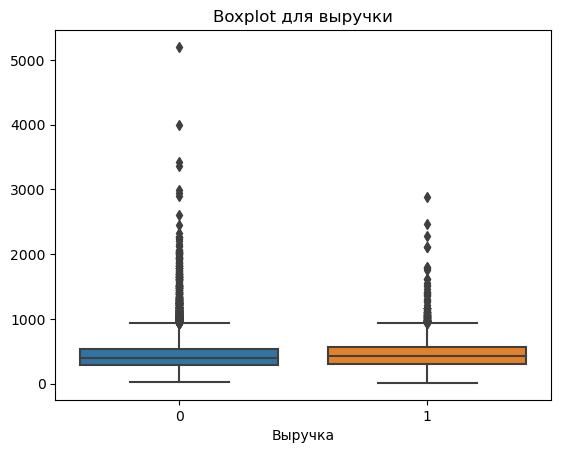

In [112]:

sns.boxplot(data = [late, in_advance])
plt.title('Boxplot для выручки')
plt.xlabel('Выручка')
plt.show()

__ВЫВОД__:
* Выбросов в значениях при покупке билетов заранее меньше и сами они меньше
* Что интересно медиана стоимости билета, для группы "билеты приобретенные заранее" больше, чем медиана стоимости билета, для группы "билеты приобретенные в последний момент"

Для начала проверим наши данные на нормальность распределения

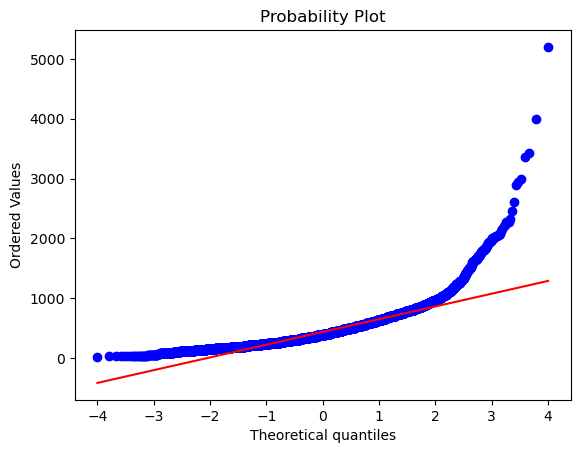

In [58]:
st.probplot(late, dist = norm, plot = plt)
plt.show()

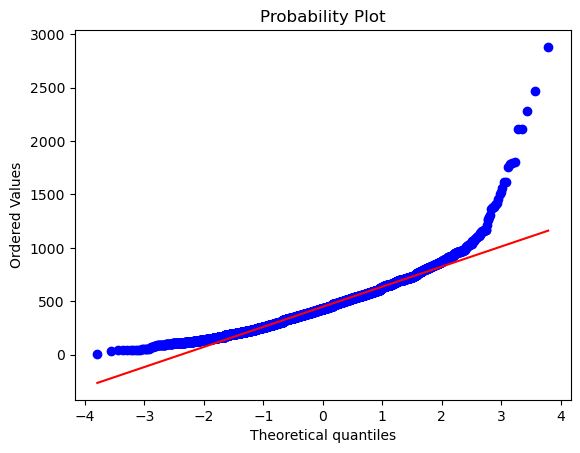

In [59]:
st.probplot(in_advance, dist = norm, plot = plt)
plt.show()

Выручка у этих двух групп не имеет нормального распределения. Значит для проверки гипотезы нам следует использовать непараметрический тест Уилкоксона-Манна-Уитни

H0: средняя выручка для групп равна

H1: средняя выручка для групп не равна

In [60]:
#H0 Выручка для групп не отличается
alpha = 0.05 # Уровень значимости
results = st.mannwhitneyu(late, in_advance)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу, выручка для двух групп различается') 
else:
    print('Не удалось отвергнуть нулевую гипотезу, выручка для двух групп не различается') 

p-value: 1.0784308545839547e-28
Следует отвергнуть нулевую гипотезу, выручка для двух групп различается


__ВЫВОД__:
* Следует отвергнуть гипотезу о равенстве, выручка для двух групп различается

[К навигации](#0)

### <a class="anchor" id="13"></a>Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений.

In [61]:
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']

df = pd.read_csv('airports.dat', names = column_names) 
df

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [62]:
#переименовываем, чтобы можно было объединить датафреймы,заполнить названия для города вылета
data_location = df[['Location', 'IATA_Code']]
data_location = data_location.rename(columns = {'Location':'orig_location', 'IATA_Code':'orig_city_code'})
data_location

,orig_location,orig_city_code
1,Goroka,GKA
2,Madang,MAG
3,Mount Hagen,HGU
4,Nadzab,LAE
5,Port Moresby,POM
...,...,...
14106,Belaya,\N
14107,Ulan Ude,\N
14108,Novgorod,\N
14109,Copiapo,CPO


In [63]:
#после изучения начальных данных, я пришла к выводу что не все коды городов соответвуют кодам аэропортов(IATA), например, для города Москвы
# Поэтому соединим способом left, чтобы не потерять города, котрых нет в кодах IATA
data_1 = data.merge(data_location, on='orig_city_code', how = 'left')
data_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group,orig_location
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее,NaN
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,В последний момент,Yuzhno-sakhalinsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,Заранее,Kaliningrad
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,За месяц,Voronezh
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,Заранее,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,За месяц,NaN
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,За месяц,St. Petersburg
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,В последний момент,NaN
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,В последний момент,Kazan


In [64]:
data_1[data_1['orig_location'].isna()]['orig_city_code'].count()#считаем количество получившихся пропусков

16188

In [65]:
data_1.query('orig_city_code == "MOW"')[data_1['orig_location'].isna()]['orig_city_code'].count()#считаем количество получившихся пропусков, для города с кодом MOW

C:\Users\paula\AppData\Local\Temp\ipykernel_8992\3148483065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_1.query('orig_city_code == "MOW"')[data_1['orig_location'].isna()]['orig_city_code'].count()#считаем количество получившихся пропусков, для города с кодом MOW


15911

Почти все пропуски, это город с кодом MOW, пропусков 15702, значит это популярный город вылета, а значит мы не можем его не заполнить

In [66]:
data_1.loc[data_1['orig_city_code']== 'MOW', 'orig_location'] = 'Moscow'# С помощью интернета найдем, что под MOW скрывается Москва
data_1#заполним пропуски

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group,orig_location
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее,Moscow
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,В последний момент,Yuzhno-sakhalinsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,Заранее,Kaliningrad
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,За месяц,Voronezh
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,Заранее,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,За месяц,Moscow
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,За месяц,St. Petersburg
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,В последний момент,Moscow
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,В последний момент,Kazan


In [67]:
#переименовываем, чтобы можно было объединить датафреймы и заполнить город назначения
data_location = data_location.rename(columns = {'orig_location':'dest_location', 'orig_city_code':'dest_city_code'})
data_1 = data_1.merge(data_location, on='dest_city_code', how = 'left')
data_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group,orig_location,dest_location
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее,Moscow,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,В последний момент,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,Заранее,Kaliningrad,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,За месяц,Voronezh,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,Заранее,Moscow,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,За месяц,Moscow,Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,За месяц,St. Petersburg,NaN
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,В последний момент,Moscow,Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,В последний момент,Kazan,NaN


In [68]:
data_1[data_1['dest_location'].isna()]['dest_city_code'].count() #считаем количество получившихся пропусков

16297

In [69]:
data_1.query('dest_city_code == "MOW"')[data_1['dest_location'].isna()]['dest_city_code'].count() #считаем количество получившихся пропусков,для Москвы

C:\Users\paula\AppData\Local\Temp\ipykernel_8992\3657449655.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_1.query('dest_city_code == "MOW"')[data_1['dest_location'].isna()]['dest_city_code'].count() #считаем количество получившихся пропусков,для Москвы


16053

In [70]:
data_1.loc[data_1['dest_city_code']== 'MOW', 'dest_location'] = 'Moscow'# С помощью интернета найдем, что под MOW скрывается Моск
data_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group,orig_location,dest_location
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее,Moscow,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,В последний момент,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,Заранее,Kaliningrad,Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,За месяц,Voronezh,Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,Заранее,Moscow,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,За месяц,Moscow,Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,За месяц,St. Petersburg,Moscow
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,В последний момент,Moscow,Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,В последний момент,Kazan,Moscow


In [71]:
# Найдем 10 самых популярных направлений перелета внутри страны
data_1.query('route_flight_type == "ВВЛ"').groupby(['orig_location', 'dest_location'])['revenue_amount'].count().reset_index().sort_values(by = 'revenue_amount', ascending = False).head(10)

,orig_location,dest_location,revenue_amount
260,Sochi,Moscow,1341
140,Moscow,Sochi,1309
265,St. Petersburg,Moscow,1212
141,Moscow,St. Petersburg,1192
197,Novosibirsk,Moscow,972
127,Moscow,Novosibirsk,956
53,Kazan,Moscow,760
109,Moscow,Kazan,758
145,Moscow,Ufa,708
214,Novosibirsk,Sochi,695


__ВЫВОДЫ__:
* Самое популярное направление для внутренних рейсов - Сочи-Москва, затем идет Москва-Сочи, на третьем месте - Санкт-Петербург-Москва
* Все направление кроме последнего включают одной из точек Москву
* Почти все направления в этом списке "парные"

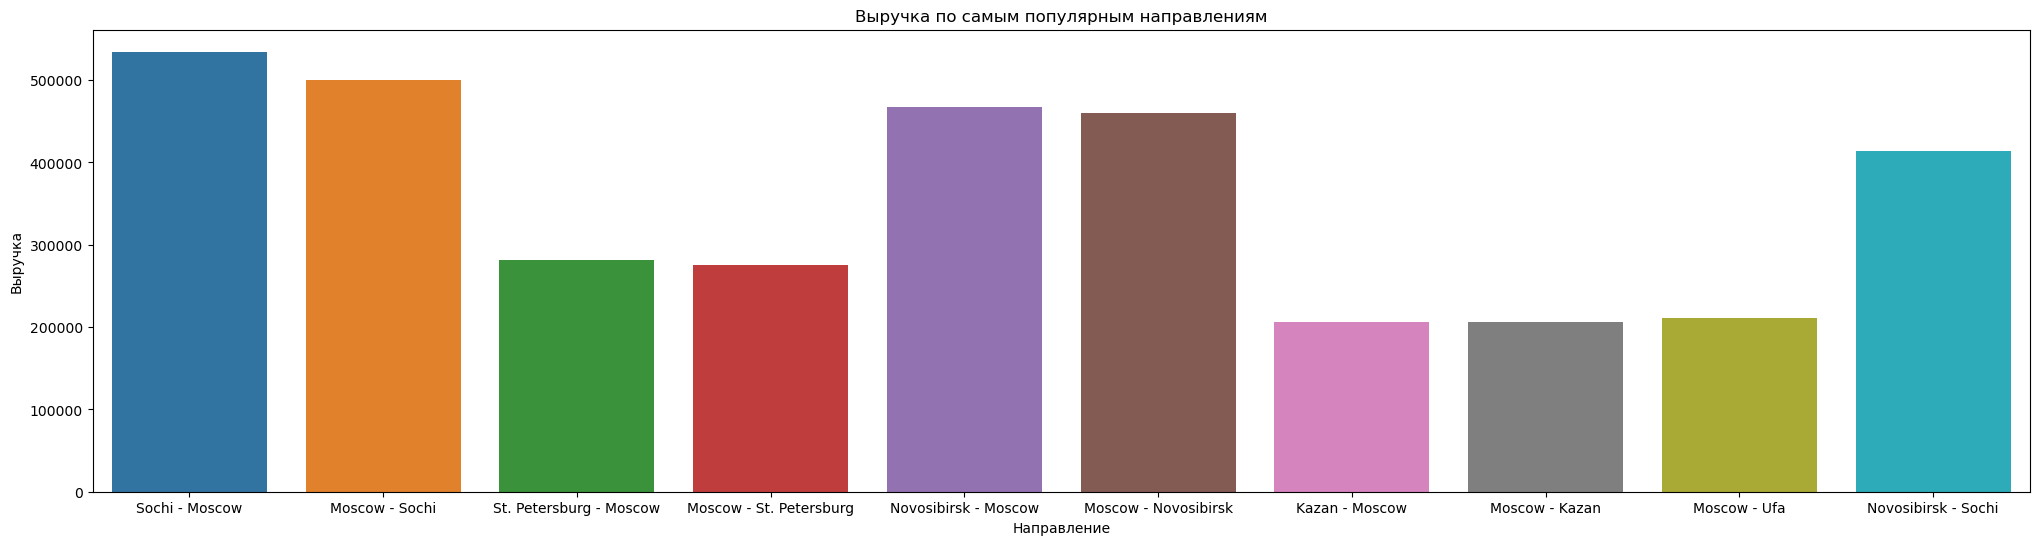

In [72]:
#Изучим выручку для этих направлений
top = data_1.query('route_flight_type == "ВВЛ"').groupby(['orig_location', 'dest_location'])['revenue_amount'].agg(['count', 'sum']).reset_index().sort_values(by = 'count', ascending = False).head(10)
top['route'] = top['orig_location'] + ' - ' + top['dest_location']
plt.figure(figsize =(25, 6))
sns.barplot(data = top, x = 'route', y = 'sum').set(title = 'Выручка по самым популярным направлениям', xlabel = 'Направление', ylabel = 'Выручка')
plt.show()

__ВЫВОДЫ__:
* Самое популярное направление приносит больше всего выручки
* Несмотря на то, что направление Санкт-Петербург_Москва, популярнее, чем Новосибирск-Москва оно приносит меньше прибыли
* Десятое по популярности направление Новосибирск-Сочи также приносит больше прибыли, чем Санкт-Петербург Москва
* Сочи популярный для туризма город в любое время года, поэтому неудивительно, что перелеты в Сочи и из Сочи приносит больше прибыли

In [73]:
# Найдем 10 самых популярных направлений для международных перелетов
data_1.query('route_flight_type == "МВЛ"').groupby(['orig_location', 'dest_location'])['revenue_amount'].count().reset_index().sort_values(by = 'revenue_amount', ascending = False).head(10)

,orig_location,dest_location,revenue_amount
147,Moscow,Osh,154
89,Khudzhand,Moscow,146
201,Osh,Moscow,136
140,Moscow,Khudzhand,130
187,Novosibirsk,Osh,122
175,Novosibirsk,Bishkek,121
203,Osh,Novosibirsk,116
91,Khudzhand,Novosibirsk,116
123,Moscow,Antalya,107
17,Bishkek,Novosibirsk,102


__ВЫВОДЫ__:
* Самое популярное международное направление - это Москва-Ош, на втором месте идет Худжанд-Москва, на третьем - Ош-Москва
* Самые популярные международные перелеты происходят/направляются из двух городов России: Москвы и Новосибирска
* Почти все направления в этом списке "парные"

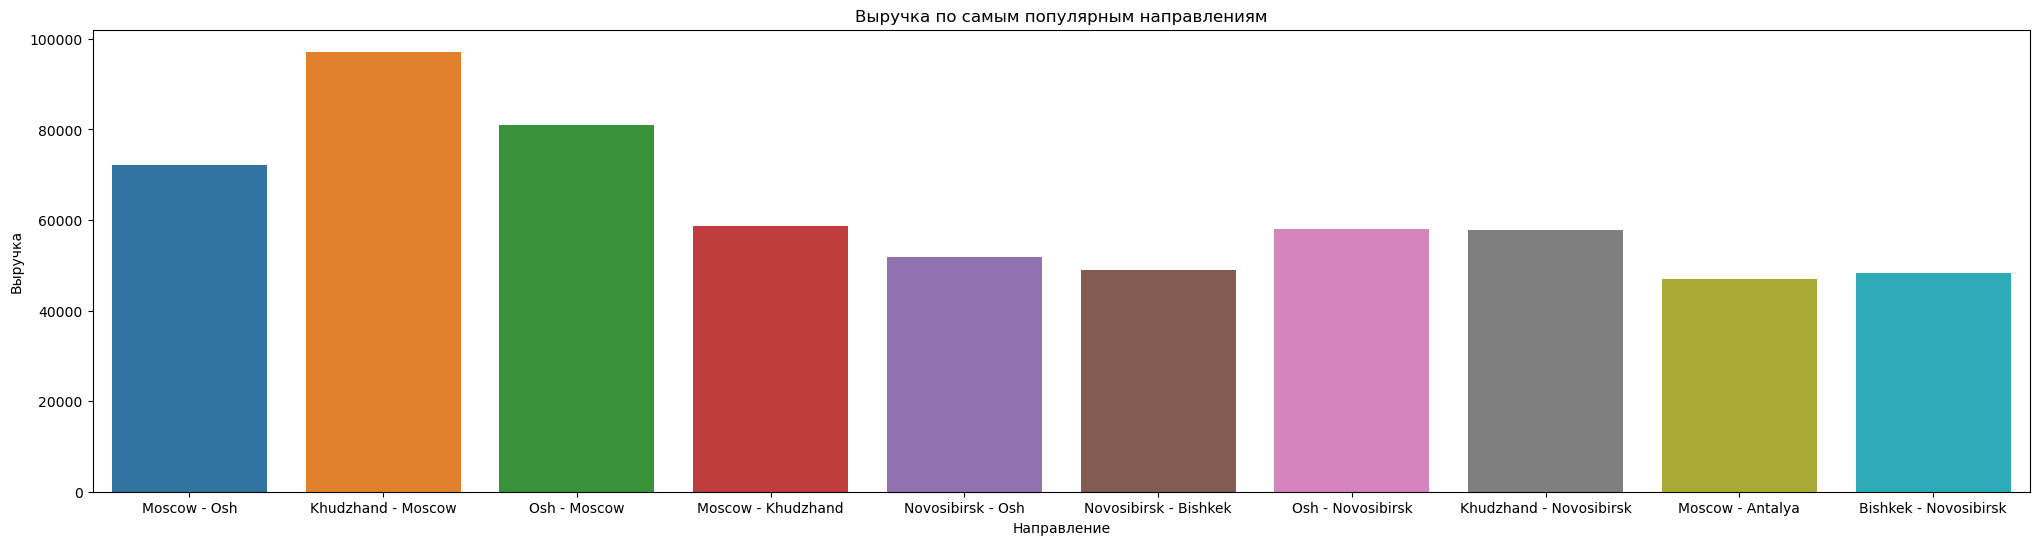

In [74]:
#Изучим выручку для этих направлений
top = data_1.query('route_flight_type == "МВЛ"').groupby(['orig_location', 'dest_location'])['revenue_amount'].agg(['count', 'sum']).reset_index().sort_values(by = 'count', ascending = False).head(10)
top['route'] = top['orig_location'] + ' - ' + top['dest_location']
plt.figure(figsize =(25, 6))
sns.barplot(data = top, x = 'route', y = 'sum').set(title = 'Выручка по самым популярным направлениям', xlabel = 'Направление', ylabel = 'Выручка')
plt.show()

__ВЫВОДЫ__:
* Больше всего выручки приносит второе по популярности международное направление Хужданд-Москва
* Самые популярные страны для международных перелетов -- это Киргизия и Таджикистан

[К навигации](#0)

__ВЫВОД__:
* Мы провели исследовательский анализ данных и выяснили, что и  как может влиять на выручку авиакомпании

# 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

In [75]:
data

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,issue_month,season,difference,group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,Заранее
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,В последний момент
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,Заранее
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,За месяц
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,Заранее
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,За месяц
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,За месяц
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,В последний момент
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,В последний момент


In [76]:
data.loc[data['sale_type'] == 'ONLINE', 'sale_type'] = 1
data.loc[data['sale_type'] != 1, 'sale_type'] = 0

In [77]:
data.groupby('issue_date')[['ffp_flag','sale_type','revenue_amount']].sum().corr()


,ffp_flag,sale_type,revenue_amount
ffp_flag,1.000000,0.944469,0.813286
sale_type,0.944469,1.000000,0.827951
revenue_amount,0.813286,0.827951,1.000000


Вывод: есть прямая тесная связь, между количеством онлайн покупок и суммарной выручкой. Также есть прямая тесная связь между количеством покупок с программой лояльности и суммарной выручкой

Вывод: Мы провели анализ выручки авиакомпании.